# Bulk RNA-seq 
Columns are each sample, rows are for each genes. I also have the column/row names.

Legend:

- GTex are normal tissues ,
- tumour samples (they are named 'TCGA')
    - 'SKCM' is melanoma', 
    - 'LUAD' and 'LUSC' are two lung cancers.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
!ls ./data/*.txt

./data/GTEx.Blood.expression_qn_log2_normalized.txt
./data/GTEx.Lung.expression_qn_log2_normalized.txt
./data/GTEx.Muscle.expression_qn_log2_normalized.txt
./data/TCGA.LUAD.expression_qn_log2_normalized.txt
./data/TCGA.LUSC.expression_qn_log2_normalized.txt
./data/TCGA.SKCM.expression_qn_log2_normalized.txt


In [100]:
organ = 'Lung' # choose one among 'Lung','Muscle','Blood'
df = pd.read_csv('./data/GTEx.'+organ+'.expression_qn_log2_normalized.txt',sep = '\t')
df_cancer = pd.read_csv('./data/TCGA.LUAD.expression_qn_log2_normalized.txt',sep = '\t')

pd.DataFrame([df.shape,df_cancer.shape],index = ['Healty','Cancer'],columns = ['n. of genes','n. of samples'])

n. of genes  n. of samples
Healty        20697            320
Cancer        15587            515

### Figure 0.1
Gene expression is very similar across samples. 

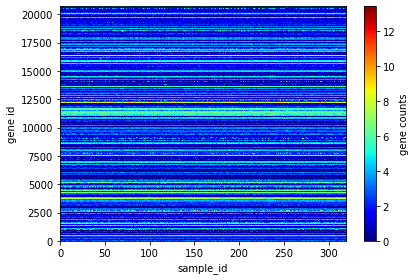

In [117]:
#plt.imshow(df.values,aspect = 'auto',origin = 'lower',norm = LogNorm(0.01,15))
plt.imshow(df.values,aspect = 'auto',origin = 'lower',cmap = 'jet')
cbar = plt.colorbar()
cbar.set_label('gene counts')
plt.xlabel('sample_id')
plt.ylabel('gene id')
plt.tight_layout()
#plt.savefig(organ+'.pdf')

We inspect the hetherogeneity at two levels:
1. Single gene view (horizontal cut)
2. Single sample view (vertical cut)

## 1. Single gene view   (horizontal cut of Figure 0.1)
For each gene we compute the  average expression over many samples.Then, we compute the histogram of the  resulting mean gene expression. Similarly for the standard deviation. Plot  below on std shows that there is a sample to sample variation on the gene count. 

Text(0, 0.5, 'n. of genes')

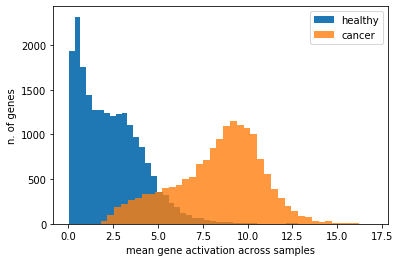

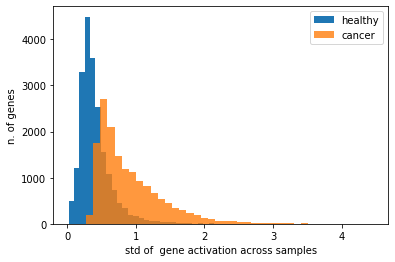

In [92]:
plt.hist(np.mean(df.values,axis = 1),40,label= 'healthy')
plt.hist(np.mean(df_cancer.values,axis = 1),40,label = 'cancer',alpha = 0.8)
plt.xlabel('mean gene activation across samples')
plt.legend()
plt.ylabel('n. of genes')
plt.figure()
plt.hist(np.std(df.values,axis = 1),40,label= 'healthy')
plt.hist(np.std(df_cancer.values,axis = 1),40,label = 'cancer',alpha = 0.8)
plt.xlabel('std of  gene activation across samples')
plt.legend()
plt.ylabel('n. of genes')


standard deviation/ mean is a measure of the relative variability  of gene count over different samples. It is mostly below 1, which indicates that the sample dependence is limited. 

Text(0, 0.5, 'n. of genes')

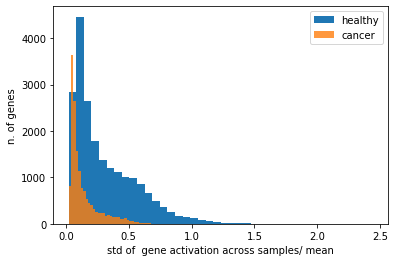

In [93]:
plt.hist(np.std(df.values,axis = 1)/np.mean(df.values,axis = 1),40,label= 'healthy')
plt.hist(np.std(df_cancer.values,axis = 1)/np.mean(df_cancer.values,axis = 1),40,label = 'cancer',alpha = 0.8)
plt.xlabel('std of  gene activation across samples/ mean')
plt.legend()
plt.ylabel('n. of genes')

(320,)

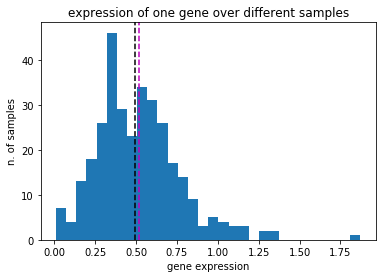

In [110]:
x = df.iloc[80].values
plt.hist(x,30)
plt.axvline(np.median(x),color = 'k',ls = '--')
plt.axvline(np.mean(x),color = 'm',ls = '--')
plt.title('expression of one gene over different samples')
plt.xlabel('gene expression')
plt.ylabel('n. of samples')
x.shape

## 2. Single sample view ( vertical cut of Figure 0.1)
On the other hand,  for each sample we take the average expression across genes, and we construct the histogram of it. The average expression across genes is the same over several samples.

In statistichal mechanics jargon, it indicates the mean magnetisation over many samples is the same

Text(0.5, 0, 'std expression across genes')

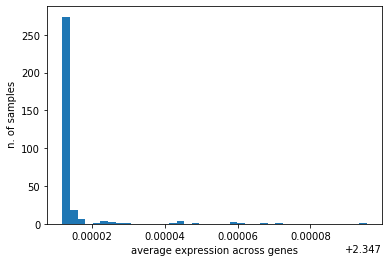

In [97]:
_ = plt.hist(np.mean(df.values,axis = 0),40,label= 'healthy')
plt.ylabel(' n. of samples')
plt.xlabel('average expression across genes')
plt.figure()
_ = plt.hist(np.std(df.values,axis = 0),40,label= 'healthy')
plt.ylabel(' n. of samples')
plt.xlabel('std expression across genes')



Gene counts in a sample has the same distribution shape over different samples

(20697, 320)


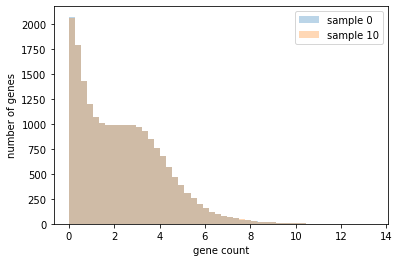

In [98]:
plt.hist(df.values[:,0],50,label = 'sample 0',alpha = 0.3)
plt.hist(df.values[:,10],50,label = 'sample 10',alpha = 0.3)
plt.xlabel('gene count')
plt.ylabel('number of genes')
plt.legend()
print(df.values.shape)


## ``Binarisining'' gene count
In each sample, subtract the gene count by the median in that sample. I compute the fraction of samples with positive rescaled count.  I show the number of genes with positive rescaled count.

In [116]:
A = [sample - np.median(sample) for sample in df.values.T]
plt.hist(np.count_nonzero(np.array(A)>0,axis = 0  )/len(A),100)
plt.xlabel('transformed gene activity ')
plt.ylabel('n. of genes')
plt.semilogy()

[]